<a href="https://colab.research.google.com/github/nbrk88/Projeto/blob/master/Tesouro_Direto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tesouro Direto**

Tesouro Direto é um Programa do Tesouro Nacional com parceria do B3(Bolsa de Valores) para venda de títulos públicos federais para pessoas físicas em plataforma online.

Lançado em 2002, o Programa teve início com o intuito de transformar o acesso aos títulos públicos mais democrático.

O Tesouro Direto é um investimento com diferentes tipos de rentabilidade (prefixada, ligada à variação da inflação ou à variação da taxa de juros básica da economia - Selic), diferentes prazos de vencimento e também diferentes fluxos de remuneração.

Este título pode ser classificado como Renda Fixa, pré ou pós fixado, ou seja, a taxa de rendimento é estabelecida no início do aporte ou final, na maioria dos casos este tipo de investimento tem períodos mais longos iguais ou superiores a 2 anos.

## Dataset

Este banco de dados foi retirado do site Portal Brasileiro de Dados Abertos do Governo Federal e tem como informações os dados cadastrados dos investidores do título entre os anos de 2004 a 2019.

De acordo com o Portal, o banco de dados é atualizado mensalmente desde o início de seu programa.


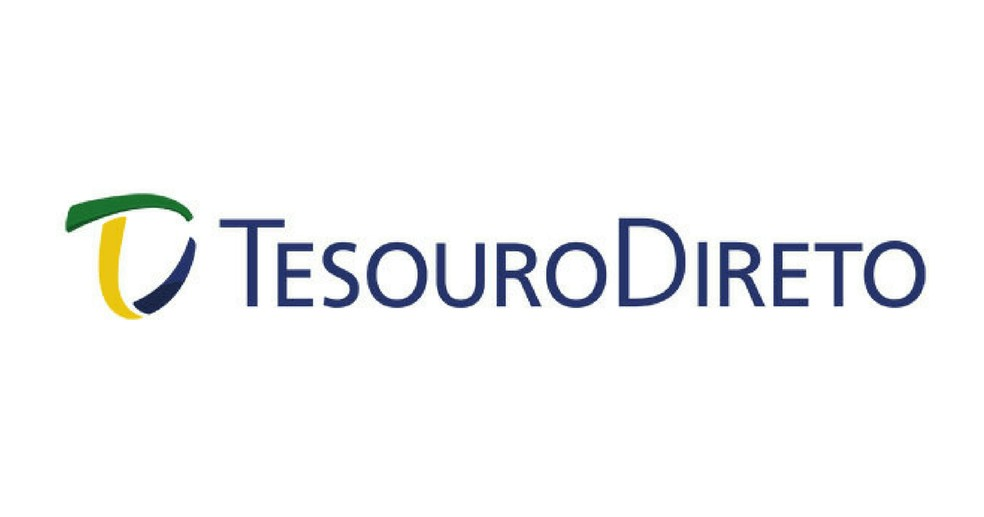

## Objetivo

O objetivo deste notebook consiste em analisar e identificar os perfis dos acionistas do Tesouro Direto quanto as suas características inseridas na plataforma online do investimento.

## Acessar o Google Drive

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import os

In [7]:
os.listdir()

['.config', 'gdrive', 'sample_data']

In [8]:
os.chdir('/content/gdrive/My Drive/Tesouro Direto')

In [9]:
os.listdir()

['tesouro_direto.xlsx', 'vantagens-de-investir-no-tesouro-direto.jpg']

## Importar os Dados




In [10]:
import pandas as pd

In [11]:
df = pd.read_excel('tesouro_direto.xlsx')

In [13]:
# Entrada dos dados
print('DIMENSÕES DO DATAFRAME')
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

DIMENSÕES DO DATAFRAME
Linhas: 1048575
Colunas: 11


In [14]:
# veriricando as nossas variáveis
df.columns

Index(['Codigo do Investidor', 'Data de Adesao', 'Estado Civil', 'Genero',
       'Profissao', 'Idade', 'UF do Investidor', 'Cidade do Investidor',
       'Pais do Investidor', 'Situacao da Conta', 'Operou 12 Meses'],
      dtype='object')

## Variáveis do Banco de Dados

### Legenda:

* Codigo do Investidor: Número de identificação do Investidor ao realizar o cadastro no título do Tesouro Direto
* Data de Adesao: Data referente ao dia em que ingressou ao Programa
* Estado Civil: Situação em que a pessoa se encontra em relação ao matrimônio
  * Solteiro
  * Casado(a) com brasileiro(a) nato
  * Casado(a) com brasileiro(a) naturalizado(a)
  * Casado(a) com estrangeiro(a)
  * União Estável
  * Divorciado(a)
  * Separado judicialmente
  * Desquitado
  * Viúvo
* Gênero: Feminino ou Masculino
* Profissão: Carreira de formação do interessado
* Idade: Idade no momento do cadastro
* UF do Investidor: Estado do acionista
* Cidade do Investidor: Cidade de moradia do acionista
* Pais do Investidor: País de origem do acionista
* Situação da Conta: Ativo ou Desativado
* Operou 12 meses: Indicação de movimentação nos últimos 12 meses, Sim ou Não

In [12]:
# visualização das cinco primeiras linhas do arquivo
df.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
0,744,2009-04-13,Casado(a) com brasileiro(a) nato(a),M,EMPRESÁRIO,51,RJ,RIO DE JANEIRO,BRASIL,D,N
1,1836,2003-09-10,Casado(a) com brasileiro(a) nato(a),M,ENGENHEIRO,62,SP,SAO PAULO,BRASIL,D,N
2,2056,2005-07-13,Viúvo(a),F,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,79,SP,SAO PAULO,BRASIL,D,N
3,2187,2003-09-29,Casado(a) com brasileiro(a) nato(a),M,EMPRESÁRIO,60,SP,SAO PAULO,BRASIL,D,N
4,2259,2004-09-15,Casado(a) com brasileiro(a) nato(a),M,ADMINISTRADOR,57,SP,SAO PAULO,BRASIL,D,N


In [15]:
# as classes de cada variável
df.dtypes

Codigo do Investidor             int64
Data de Adesao          datetime64[ns]
Estado Civil                    object
Genero                          object
Profissao                       object
Idade                            int64
UF do Investidor                object
Cidade do Investidor            object
Pais do Investidor              object
Situacao da Conta               object
Operou 12 Meses                 object
dtype: object

In [62]:
# resumo estatístico do dado numérico (idade sendo o único, já que 'Codigo do Investidor' trata-se do número de identificação)
df.describe()['Idade']

count    1.048575e+06
mean     3.915635e+01
std      1.248080e+01
min      1.000000e+00
25%      3.000000e+01
50%      3.600000e+01
75%      4.500000e+01
max      1.200000e+02
Name: Idade, dtype: float64

## Verificar os dados faltantes

In [17]:
# o dataset está completo, não tendo dados faltantes
df.isnull().sum()

Codigo do Investidor    0
Data de Adesao          0
Estado Civil            0
Genero                  0
Profissao               0
Idade                   0
UF do Investidor        0
Cidade do Investidor    0
Pais do Investidor      0
Situacao da Conta       0
Operou 12 Meses         0
dtype: int64

## Análise

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

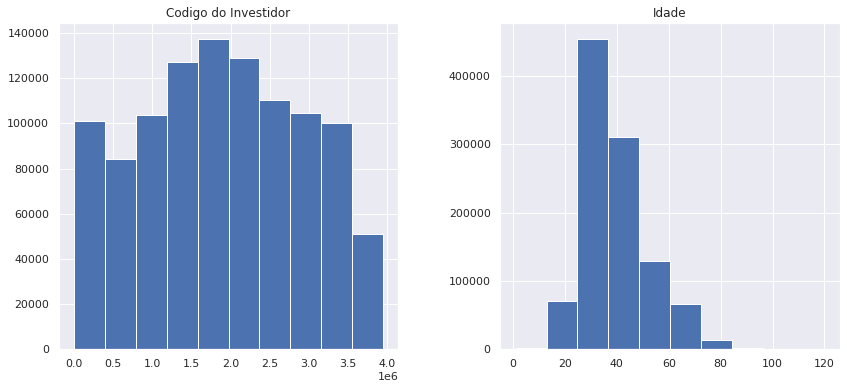

In [19]:
sns.set(rc={'figure.figsize':(14,10)})
df.hist(figsize=(14,6));

In [71]:
idade = df['Idade'].unique()
print(sorted(idade))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 119, 120]


A coluna relacionada como 'Idade' não será uma boa variável para análise, pois as informações cadastradas fogem com a realidade, sendo que a idade mínima do investidor consta como sendo 1 e o máximo 120, porém podemos verificar que dentre os que informaram corretamente a maior faixa de interessados pelo título público está entre os 30 a 40 anos.

### Profissão

In [20]:
# lista das profissões cadastradas
df['Profissao'].unique()

array(['EMPRESÁRIO', 'ENGENHEIRO',
       'VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA', 'ADMINISTRADOR',
       'APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)', 'ECONOMISTA', 'MÉDICO',
       'TRABALHADOR METALÚRGICO E SIDERÚRGICO', 'ANALISTA DE SISTEMAS',
       'ENFERMEIRO E NUTRICIONISTA', 'ADVOGADO', 'BANCARIO E ECONOMIÁRIO',
       'SERVIDOR PÚBLICO FEDERAL', 'PROFESSOR DE ENSINO SUPERIOR',
       'CONTADOR', 'TRABALHADOR AUTÔNOMO', 'PUBLICITÁRIO',
       'DIRETOR DE EMPRESAS', 'GERENTE', 'ARQUITETO', 'OUTROS',
       'JORNALISTA', 'PROPRIETARIO DE MICROEMPRESAS',
       'CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL',
       'PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SERVIÇOS',
       'PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS', 'RELAÇÕES PÚBLICAS',
       'TECNÓLOGO', 'PROFISSIONAL LIBERAL', 'TRABALHADOR AGRÍCOLA',
       'BIÓLOGO E BIOMÉDICO',
       'CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR',
       'SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIONISTA,TE

In [21]:
# quantidade dos cadastros das profissões
len(df['Profissao'].unique())

158

Dentre os 1 milhão de cadastrados, podemos verificar que há 158 Profissões que se repetem dentre os Investidores. 

In [22]:
# contagem das sessenta primeiras profissões por ordem decrescente 
df.groupby(df['Profissao']).count()['Codigo do Investidor'].sort_values(ascending=False)[:60]

Profissao
OUTROS                                                           225074
ENGENHEIRO                                                        82760
ADMINISTRADOR                                                     81233
EMPRESÁRIO                                                        52854
ANALISTA DE SISTEMAS                                              49190
MÉDICO                                                            44008
ADVOGADO                                                          37531
ESTUDANTE                                                         35418
BANCARIO E ECONOMIÁRIO                                            32318
SERVIDOR PÚBLICO FEDERAL                                          25376
APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)                           25078
GERENTE                                                           23919
SERVIDO PÚBLICO ESTADUAL                                          19472
CONTADOR                                              

In [23]:
# separei as dez primeiras profissões para análise
df.groupby(df['Profissao']).count()['Codigo do Investidor'].sort_values(ascending=False)[:10]

Profissao
OUTROS                      225074
ENGENHEIRO                   82760
ADMINISTRADOR                81233
EMPRESÁRIO                   52854
ANALISTA DE SISTEMAS         49190
MÉDICO                       44008
ADVOGADO                     37531
ESTUDANTE                    35418
BANCARIO E ECONOMIÁRIO       32318
SERVIDOR PÚBLICO FEDERAL     25376
Name: Codigo do Investidor, dtype: int64

In [24]:
# percentual das dez profissões em relação ao total
(df.groupby(df['Profissao']).count()['Codigo do Investidor'] / df.shape[0] * 100).sort_values(ascending=False)[:10]

Profissao
OUTROS                      21.464750
ENGENHEIRO                   7.892616
ADMINISTRADOR                7.746990
EMPRESÁRIO                   5.040555
ANALISTA DE SISTEMAS         4.691128
MÉDICO                       4.196934
ADVOGADO                     3.579238
ESTUDANTE                    3.377727
BANCARIO E ECONOMIÁRIO       3.082088
SERVIDOR PÚBLICO FEDERAL     2.420046
Name: Codigo do Investidor, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


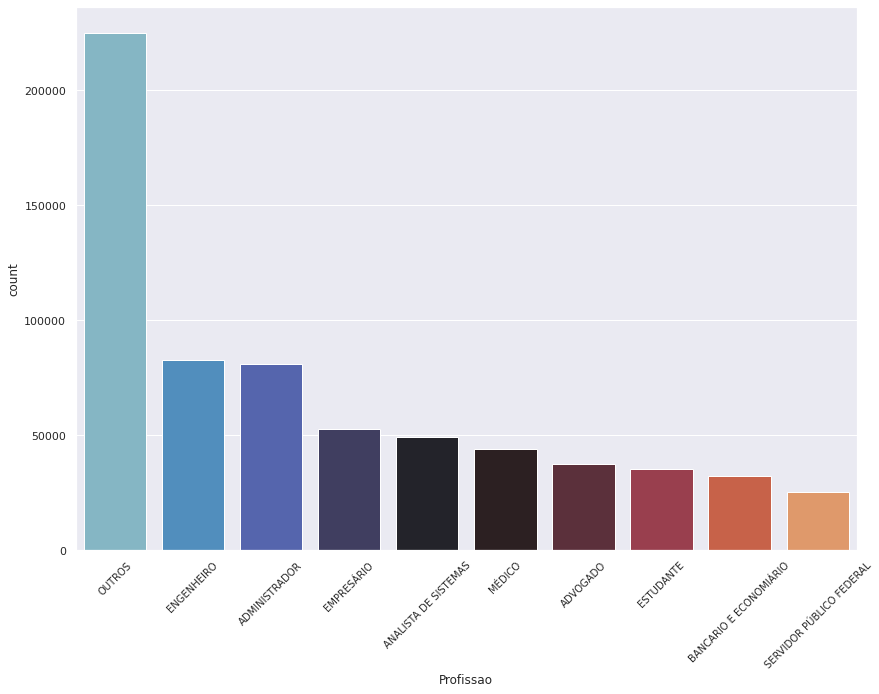

In [25]:
prof = sns.countplot(df['Profissao'], order=df['Profissao'].value_counts().iloc[:10].index, palette='icefire')
prof.set_xticklabels(rotation=45, fontsize=10, labels = df['Profissao'].value_counts().iloc[:10].index);

### Gênero

In [26]:
# contagem sobre o gênero dos investidores mulheres e homens
df.groupby(df['Genero']).count()['Codigo do Investidor']

Genero
F    264183
M    784392
Name: Codigo do Investidor, dtype: int64

In [27]:
# percentual dos investidores mulheres e homens
df.groupby(df['Genero']).count()['Codigo do Investidor'] / df.shape[0] * 100

Genero
F    25.194478
M    74.805522
Name: Codigo do Investidor, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


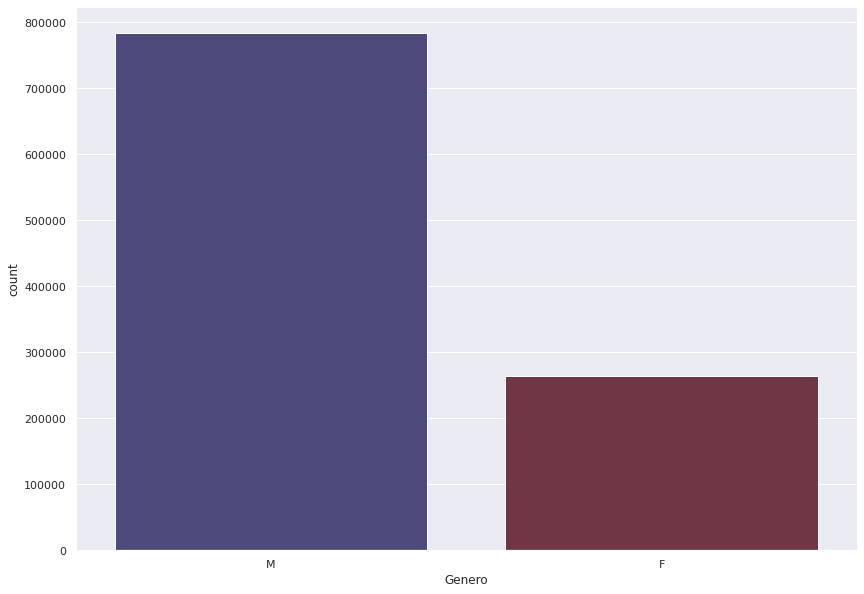

In [28]:
sns.countplot(df['Genero'], palette='icefire');

### Estado

In [29]:
# lista de todos os estados divididos pela UF
df['UF do Investidor'].unique()

array(['RJ', 'SP', 'PR', 'SC', 'BA', 'MT', 'DF', 'PE', 'RS', 'PA', 'RO',
       'PI', 'MG', 'ES', 'PB', 'SE', 'CE', 'GO', 'AM', 'MA', 'MS', 'TO',
       'AC', 'RN', 'AL', 'RR', 'AP'], dtype=object)

In [30]:
# podemos verificar que todos os Estados União estão presentes
len(df['UF do Investidor'].unique())

27

In [31]:
# contagem dos investidores divididos pelo Estado
df.groupby(df['UF do Investidor']).count()['Codigo do Investidor'].sort_values(ascending=False)

UF do Investidor
SP    431507
RJ    132037
MG     88214
PR     62754
RS     54708
SC     45087
DF     39033
BA     30060
GO     21935
ES     20929
PE     20820
CE     18406
PA     10175
MT     10012
MS      8508
AM      8118
RN      7751
PB      7176
MA      6841
SE      5528
AL      5039
PI      4098
RO      3986
TO      2425
AC      1348
RR      1042
AP      1038
Name: Codigo do Investidor, dtype: int64

In [32]:
# percentual de cadastros por Estados sobre o Total
(df.groupby(df['UF do Investidor']).count()['Codigo do Investidor'] / df.shape[0] * 100).sort_values(ascending=False)

UF do Investidor
SP    41.151754
RJ    12.592042
MG     8.412751
PR     5.984694
RS     5.217366
SC     4.299835
DF     3.722481
BA     2.866748
GO     2.091887
ES     1.995947
PE     1.985552
CE     1.755335
PA     0.970365
MT     0.954820
MS     0.811387
AM     0.774194
RN     0.739194
PB     0.684357
MA     0.652409
SE     0.527192
AL     0.480557
PI     0.390816
RO     0.380135
TO     0.231266
AC     0.128555
RR     0.099373
AP     0.098991
Name: Codigo do Investidor, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


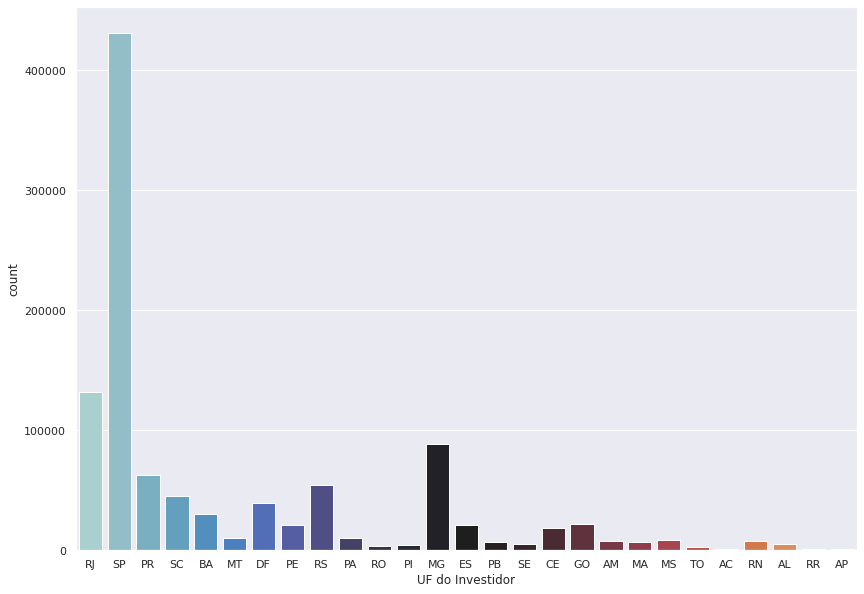

In [33]:
sns.countplot(df['UF do Investidor'], palette='icefire');

## Acréscimo das colunas 'Ano' e 'Mês'

### Período do cadastro

In [34]:
# acresci mais duas colunas no dataframe para analisar os dados pelo ano e mês de cadastros
df['Month'] = df['Data de Adesao'].dt.month
df['Year'] = df['Data de Adesao'].dt.year
df.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses,Month,Year
0,744,2009-04-13,Casado(a) com brasileiro(a) nato(a),M,EMPRESÁRIO,51,RJ,RIO DE JANEIRO,BRASIL,D,N,4,2009
1,1836,2003-09-10,Casado(a) com brasileiro(a) nato(a),M,ENGENHEIRO,62,SP,SAO PAULO,BRASIL,D,N,9,2003
2,2056,2005-07-13,Viúvo(a),F,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,79,SP,SAO PAULO,BRASIL,D,N,7,2005
3,2187,2003-09-29,Casado(a) com brasileiro(a) nato(a),M,EMPRESÁRIO,60,SP,SAO PAULO,BRASIL,D,N,9,2003
4,2259,2004-09-15,Casado(a) com brasileiro(a) nato(a),M,ADMINISTRADOR,57,SP,SAO PAULO,BRASIL,D,N,9,2004


In [35]:
# como os meses vieram com os números respectivos, tive que substituir para as siglas
meses = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
df['Month'] = df['Month'].replace(meses)
df['Month']

0          Abr
1          Set
2          Jul
3          Set
4          Set
          ... 
1048570    Abr
1048571    Jul
1048572    Ago
1048573    Jul
1048574    Abr
Name: Month, Length: 1048575, dtype: object

In [36]:
# contagem pelo mês que houve mais cadastros no título
df.groupby(df['Month']).count()['Codigo do Investidor'].sort_values(ascending=False)

Month
Mar    106099
Jul     98984
Jan     93657
Ago     93417
Jun     93332
Set     92784
Mai     88716
Abr     83354
Out     82447
Nov     77321
Fev     77234
Dez     61230
Name: Codigo do Investidor, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


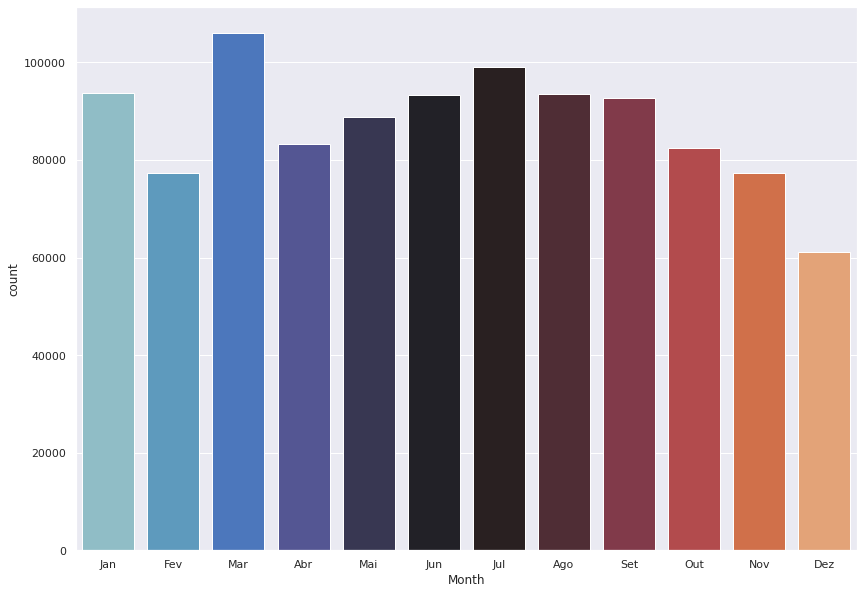

In [37]:
sns.countplot(df['Month'], palette='icefire', order=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

In [38]:
# contagem pelo ano que houve mais cadastros
df.groupby(df['Year']).count()['Codigo do Investidor'].sort_values(ascending=False)

Year
2017    359990
2018    332770
2016    198684
2019    114729
2015     20595
2014      6708
2013      4996
2011      4253
2012      2604
2010      1760
2009       461
2008       333
2003       143
2007       136
1900       114
2006        94
2005        87
2002        62
2004        56
Name: Codigo do Investidor, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


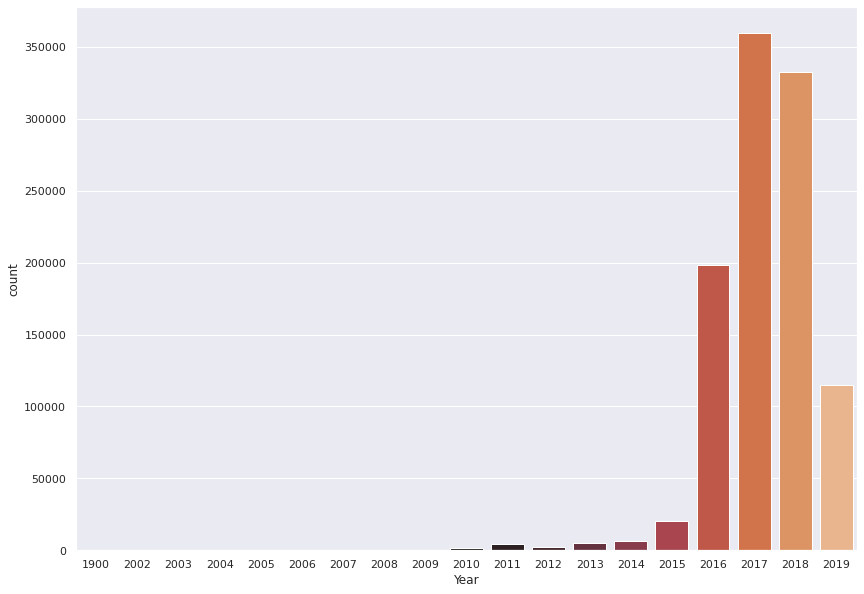

In [39]:
sns.countplot(df['Year'], palette='icefire')

### Estado Civil

In [40]:
df['Estado Civil'].unique()

array(['Casado(a) com brasileiro(a) nato(a)', 'Viúvo(a)', 'Solteiro(a)',
       'União estável', 'Divorciado(a)', 'Separado judic.',
       'Desquitado(a)', 'Casado(a) com brasileiro(a) naturalizado(a)',
       'Casado(a) com estrangeiro(a)'], dtype=object)

In [41]:
df.groupby(df['Estado Civil'])['Codigo do Investidor'].count().sort_values(ascending=False)

Estado Civil
Solteiro(a)                                    469837
Casado(a) com brasileiro(a) nato(a)            445192
Divorciado(a)                                   57599
União estável                                   48726
Separado judic.                                 16294
Viúvo(a)                                        10804
Desquitado(a)                                      54
Casado(a) com estrangeiro(a)                       36
Casado(a) com brasileiro(a) naturalizado(a)        33
Name: Codigo do Investidor, dtype: int64

In [42]:
(df.groupby(df['Estado Civil'])['Codigo do Investidor'].count().sort_values(ascending=False) / df.shape[0] * 100)

Estado Civil
Solteiro(a)                                    44.807191
Casado(a) com brasileiro(a) nato(a)            42.456858
Divorciado(a)                                   5.493074
União estável                                   4.646878
Separado judic.                                 1.553918
Viúvo(a)                                        1.030351
Desquitado(a)                                   0.005150
Casado(a) com estrangeiro(a)                    0.003433
Casado(a) com brasileiro(a) naturalizado(a)     0.003147
Name: Codigo do Investidor, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


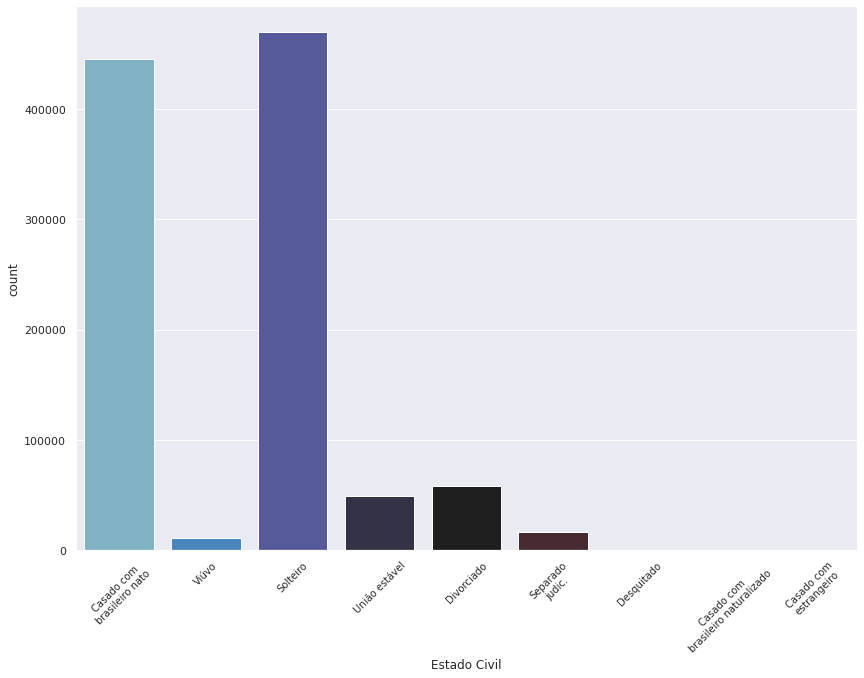

In [43]:
a = sns.countplot(df['Estado Civil'], palette='icefire')
a.set_xticklabels(rotation=45, fontsize=10, labels = ['Casado com\nbrasileiro nato', 'Viúvo', 'Solteiro', 'União estável', 'Divorciado', 'Separado\njudic.', 'Desquitado','Casado com\nbrasileiro naturalizado', 'Casado com\nestrangeiro',]);

## Atividade da Conta nos últimos doze meses

In [51]:
df.groupby(df['Situacao da Conta']).count()['Codigo do Investidor']

Situacao da Conta
A    1008547
D      40028
Name: Codigo do Investidor, dtype: int64

In [52]:
df.groupby(df['Situacao da Conta']).count()['Codigo do Investidor'] / df.shape[0] * 100

Situacao da Conta
A    96.182629
D     3.817371
Name: Codigo do Investidor, dtype: float64

In [53]:
df.groupby(df['Operou 12 Meses']).count()['Codigo do Investidor']

Operou 12 Meses
N    900026
S    148549
Name: Codigo do Investidor, dtype: int64

In [54]:
df.groupby(df['Operou 12 Meses']).count()['Codigo do Investidor'] / df.shape[0] * 100

Operou 12 Meses
N    85.83325
S    14.16675
Name: Codigo do Investidor, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


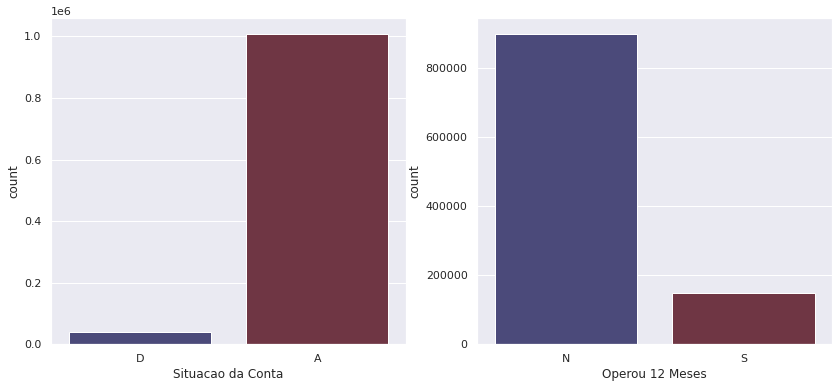

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
sns.countplot('Situacao da Conta', data=df, palette = 'icefire', ax=ax1)
sns.countplot('Operou 12 Meses', data=df, palette = 'icefire', ax=ax2);

# Conclusão

A estratégia do programa de democratizar o título tem surtido efeitos, ainda pequenos levado com comparação com o número total de habitantes brasileiros em 2018 com seus 209.5 milhões, mas são fatos que já se demonstram serem expressivos uma vez que culturalmente a população brasileira não tem o hábito de guardar dinheiro.
Visto que em sua maioria ainda são muito tradicionais quando se fala em rendimentos, excluindo a poupança e outras formas de investimento como renda variável por exemplo.

Como análise do perfil do investidor do Tesouro Direto baseado nos dados colhidos pelo dataset disponibilizado pelo portal, chegamos à conclusão que dos 1 milhão de cadastros realizados, em sua maioria são homens, solteiros ou casados com brasileiras natas e que moram no Estado de São Paulo.

Quanto à profissão a opção 'Outros' não foi esclarecida ao certo se ao preencher o cadastro não havia uma melhor seleção, ou se o investidor preferiu abster-se de informá-la, mas como os números eram muito expressivos, optei por mantê-los no estudo, porém as outras carreiras de destaque são Administrador e Engenheiro, ambos com 7% de representatividade.

Referente aos meses conseguimos enxergar que os meses de Janeiro, Março e Junho possuem os maiores números de cadastros, talvez pela promessa de mudança de hábitos para o próximo ano (Janeiro e Março) e Junho com o resgate do Imposto de Renda. Fevereiro temos como referência o Carnaval, o que explica a queda da quantidade. Fato curioso, é a queda que ocorre pós o mês de Junho, levando até Dezembro com a menor quantia de cadastros, talvez pelas festas de final de ano e ano novo. 

O Tesouro Direto trata-se de uma opção de investimento de Renda Fixa, desta forma podemos identificar o fato que os titulares estejam 'Ativos', mas tenham feito movimentação fora do prazo dos 12 meses, já que o resgate do investimento em muitos casos são de longa duração.